0 - UPLOAD DATASET

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


1 - DOWNLOAD THE DATASET          
2 - LOAD THE DATASET 

In [ ]:
import pandas as pd 
import numpy as np
import sklearn as sk
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/Churn_Modelling.csv")
df=data.head(10)

**3 - 1 UNIVARIENT ANALYSIS**

<BarContainer object of 10 artists>

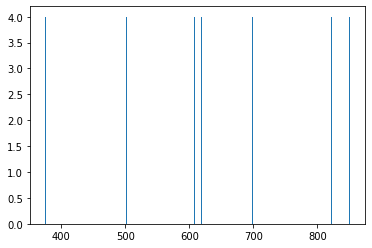

In [ ]:
import matplotlib.pyplot as plt
plt.bar (df['CreditScore'],4)

**BIVARIENT ANALYSIS**

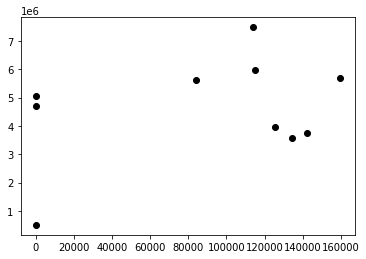

In [ ]:
plt.scatter(df['Balance'],df['EstimatedSalary']*50,c="black")

**MULTIVARIENT ANALYSIS**

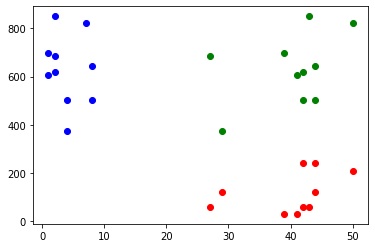

In [ ]:

ptt = plt.scatter(df['Age'],df['Tenure']*30,c="red")
ptt = plt.scatter(df['Age'],df['CreditScore'],c="green")
ptt = plt.scatter(df['Tenure'],df['CreditScore'],c="blue")

**4)PERFORM DESCRIPTIVE STATISTICS ON THE DATASET**

In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


5)   **HANDLING THE MISSING VALUES**

In [ ]:
data.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**6) FIND THE OUTLIERS AND REPLACE THE OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


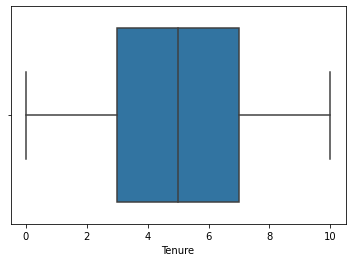

In [ ]:
sns.boxplot(data['Tenure'])


**REMOVING OUTLIERS**

In [ ]:
q=data.quantile(q=[0.75,0.5])
iqr=q.iloc[0]-q.iloc[1]
iqr

RowNumber           2499.7500
CustomerId         62495.7500
CreditScore           66.0000
Age                    7.0000
Tenure                 2.0000
Balance            30445.7000
NumOfProducts          1.0000
HasCrCard              0.0000
IsActiveMember         0.0000
EstimatedSalary    49194.3325
Exited                 0.0000
dtype: float64

In [ ]:
l=q.iloc[1]-(1.5*iqr)
u=q.iloc[1]+(1.5*iqr)
print(l['Tenure'])
print(u['Tenure'])

2.0
8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


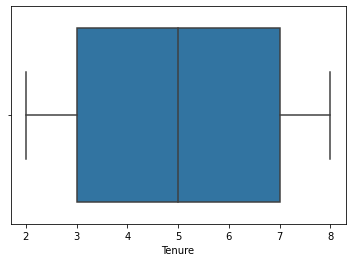

In [ ]:
data['Tenure']=np.where(data['Tenure']>u['Tenure'],u['Tenure'],np.where(data['Tenure']<l['Tenure'],l['Tenure'],data['Tenure']))
sns.boxplot(data['Tenure'])

**7) CHECK FOR CATEGORICAL COLUMNS AND PERFORN ENCODING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10 non-null     int64  
 1   CustomerId       10 non-null     int64  
 2   Surname          10 non-null     object 
 3   CreditScore      10 non-null     int64  
 4   Geography        10 non-null     object 
 5   Gender           10 non-null     object 
 6   Age              10 non-null     int64  
 7   Tenure           10 non-null     int64  
 8   Balance          10 non-null     float64
 9   NumOfProducts    10 non-null     int64  
 10  HasCrCard        10 non-null     int64  
 11  IsActiveMember   10 non-null     int64  
 12  EstimatedSalary  10 non-null     float64
 13  Exited           10 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,Female,41,2.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,2.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,Male,35,8.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,1,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [ ]:
data['Surname']=le.fit_transform(data['Surname'])
data['Gender']=data['Gender'].replace(['Male','Female'],[0,1])
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,1,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,1,41,2.0,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,1,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,1,39,2.0,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,1,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,0,0,35,8.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,0,1,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,1,0,42,3.0,75075.31,2,1,0,92888.52,1


**8)Split the data into dependent and independent variables**

In [ ]:
x=data.iloc[:,0:13]
x

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,1115,619,0,1,42,2.0,0.00,1,1,1,101348.88
1,2,15647311,1177,608,2,1,41,2.0,83807.86,1,0,1,112542.58
2,3,15619304,2040,502,0,1,42,8.0,159660.80,3,1,0,113931.57
3,4,15701354,289,699,0,1,39,2.0,0.00,2,0,0,93826.63
4,5,15737888,1822,850,2,1,43,2.0,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,0,0,39,5.0,0.00,2,1,0,96270.64
9996,9997,15569892,1336,516,0,0,35,8.0,57369.61,1,1,1,101699.77
9997,9998,15584532,1570,709,0,1,36,7.0,0.00,1,0,1,42085.58
9998,9999,15682355,2345,772,1,0,42,3.0,75075.31,2,1,0,92888.52


**DEPENDENT VARIABLES**

In [ ]:
y=data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**9)SCALING THE INDEPENDENT VARIABLES**


In [ ]:
from sklearn.preprocessing import scale
scale(x)

array([[-1.73187761, -0.78321342, -0.46418322, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.60653412, -0.3909112 , ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479, -0.99588476,  0.62898807, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479, -1.47928179,  0.07353887, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 , -0.11935577,  0.98943914, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761, -0.87055909,  1.4692527 , ...,  0.64609167,
        -1.03067011, -1.07636976]])

**10)SPLIT THE DATA INTO TRAINING AND TESTING**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#Train Shape
print("X TRAIN ",x_train.shape)
print("Y TRAIN ",y_train.shape)
#Test shape
print()
print("X TEST ",x_test.shape)
print("Y TEST ",y_test.shape)

X TRAIN  (8000, 13)
Y TRAIN  (8000,)

X TEST  (2000, 13)
Y TEST  (2000,)


In [ ]:
x_train

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3937,3938,15610165,1234,761,0,1,26,2.0,0.00,2,1,1,199409.19
6077,6078,15738588,1908,660,1,1,37,2.0,133200.09,1,0,0,71433.88
46,47,15602280,1689,829,1,1,27,8.0,112045.67,1,1,1,119708.21
9549,9550,15772604,492,578,2,0,36,2.0,157267.95,2,1,0,141533.19
4549,4550,15587611,1367,537,0,0,59,8.0,0.00,2,0,0,103799.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,3758,15679284,35,593,2,1,45,6.0,79259.75,1,1,0,55347.28
2603,2604,15583049,2754,643,1,1,34,7.0,160426.07,1,0,1,188533.11
312,313,15674398,2338,642,0,0,38,3.0,0.00,2,0,0,171463.83
5865,5866,15735339,1617,663,0,0,39,4.0,0.00,1,1,0,76884.05


In [ ]:
y_train

3937    0
6077    0
46      1
9549    0
4549    1
       ..
3757    0
2603    0
312     0
5865    0
4597    1
Name: Exited, Length: 8000, dtype: int64

In [ ]:
x_test

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
1240,1241,15617934,2403,579,0,0,36,8.0,129829.59,1,1,1,60906.12
2159,2160,15641835,80,683,0,0,72,3.0,140997.26,1,0,1,52876.41
8168,8169,15599182,2266,597,2,1,33,2.0,0.00,2,1,1,4700.66
252,253,15793726,1703,681,0,1,79,2.0,0.00,2,0,1,170968.99
6551,6552,15651740,1895,525,2,1,30,5.0,0.00,2,0,1,149195.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8098,8099,15594391,2356,770,0,1,68,2.0,183555.24,1,0,0,159557.28
8749,8750,15701238,464,683,0,0,47,2.0,0.00,2,1,0,148989.15
3234,3235,15664907,49,527,0,0,47,2.0,0.00,1,1,0,21312.16
6330,6331,15715117,2139,744,0,1,39,6.0,0.00,1,0,0,10662.58


In [ ]:
y_test

8976    0
8328    0
6044    0
2062    0
285     0
       ..
368     0
7900    1
9824    0
9336    0
7558    1
Name: Exited, Length: 2000, dtype: int64